In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
housing=pd.read_csv("C:\\Arvind Files\\ML PROJECT FILES\\house-prices-advanced-regression-techniques\\train.csv",engine='python')

In [83]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


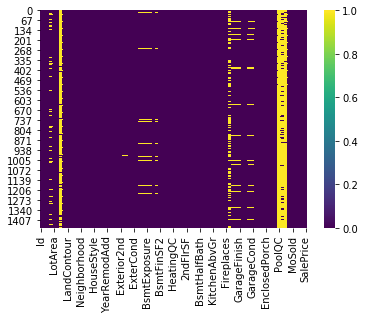

In [84]:
sns.heatmap(housing.isnull(),cmap='viridis',yticklabels='auto')

In [85]:
housing_corr=housing.corr()
print(housing_corr['SalePrice']>0.5)

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual       True
OverallCond      False
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath          True
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt      False
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
Name: SalePrice, dtype: bool


In [86]:
X=housing[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
y=housing['SalePrice']

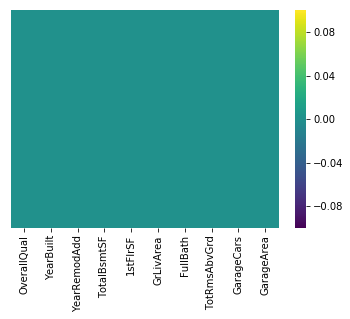

In [87]:
sns.heatmap(X.isnull(),cmap='viridis',yticklabels=False)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [91]:
test_data=pd.read_csv('C:\\Arvind Files\\ML PROJECT FILES\\house-prices-advanced-regression-techniques\\test.csv',engine='python')

In [92]:
X_test=test_data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

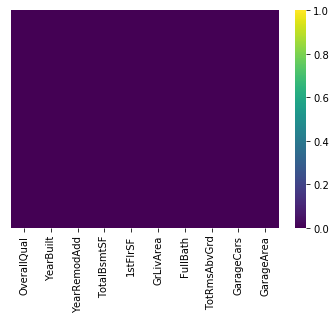

In [93]:
sns.heatmap(X_test.isnull(),cmap='viridis',yticklabels=False)

In [94]:
model1=KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=10, p=2, metric='minkowski', metric_params=None, n_jobs=1)
model1.fit(X_train,y_train)
val_pred1=model1.predict(X_val)
X_test.fillna(value=X_test.mean(),inplace=True)
test_pred1=model1.predict(X_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)
print(val_pred1)

C:\Users\arvind\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


            0
0    136605.0
1    299533.6
2    123680.0
3    137600.0
4    254438.6
5     74180.0
6    192600.0
7    162440.0
8     74180.0
9    114500.0
10   146176.8
11   116900.0
12   134480.0
13   231000.0
14   182700.0
15   126700.0
16   196200.0
17   133425.0
18   124540.0
19   205000.0
20   191380.0
21   191580.0
22   163480.0
23   122600.0
24   232956.0
25   168300.0
26   182549.6
27   116880.0
28   177800.0
29   198543.0
..        ...
452  297320.0
453  153180.0
454  124440.0
455  191340.0
456  296442.6
457  294341.8
458  221460.0
459  168930.0
460  128440.0
461   83580.0
462  230180.0
463  205440.0
464  159616.0
465  410550.0
466  190680.0
467  207198.0
468  154479.0
469  309500.0
470   94300.0
471   97640.0
472  120000.0
473  109400.0
474  187280.0
475  249039.6
476  150960.0
477  115720.0
478  114200.0
479  197500.0
480  126000.0
481  224194.0

[482 rows x 1 columns]


In [95]:
model2=GradientBoostingRegressor(max_depth=4,min_samples_leaf=3,min_samples_split=6,n_estimators=100,subsample=1.0)
model2.fit(X_train,y_train)
val_pred2=model2.predict(X_val)
X_test.fillna(value=X_test.mean(),inplace=True)
test_pred2=model2.predict(X_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)
print(val_pred2)

C:\Users\arvind\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


                 0
0    136595.801629
1    348163.877284
2    118261.111153
3    162887.622895
4    318972.314291
5     75835.031796
6    212418.580924
7    162278.936085
8     75835.031796
9    123313.300317
10   158325.913283
11   120309.069060
12   102897.846121
13   217662.553832
14   182798.938415
15   132895.070683
16   196766.465348
17   137891.750900
18   119742.642362
19   207341.518385
20   199270.221826
21   241712.232441
22   175482.455589
23   129666.235014
24   205284.630194
25   170573.797866
26   189733.743686
27   100052.336600
28   183163.081396
29   193284.421914
..             ...
452  239849.930575
453  154802.899017
454  121569.271996
455  185493.238704
456  347395.227048
457  327863.789044
458  253075.590577
459  160410.331793
460  127562.852792
461   93000.806848
462  182442.365573
463  213614.767279
464  178177.865551
465  504462.639821
466  197075.735407
467  207184.754869
468  147251.568952
469  315403.266356
470  122539.364211
471  107213.656439
472  124634.

In [96]:
df_val=pd.concat([X_val,val_pred1,val_pred2],axis=1)
df_test=pd.concat([X_test,test_pred1,test_pred2],axis=1)
model=xgb.XGBRegressor(max_depth=4)
df_val.drop(0,axis=1,inplace=True)
for i in range(1,484):
    y_val[i]=y_val.mean()
model.fit(df_val,y_val)
final_result=model.predict(X_test)

C:\Users\arvind\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:52:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [97]:
dataframe=pd.DataFrame(test_data['Id'],columns=['Id'])
print(dataframe)

        Id
0     1461
1     1462
2     1463
3     1464
4     1465
5     1466
6     1467
7     1468
8     1469
9     1470
10    1471
11    1472
12    1473
13    1474
14    1475
15    1476
16    1477
17    1478
18    1479
19    1480
20    1481
21    1482
22    1483
23    1484
24    1485
25    1486
26    1487
27    1488
28    1489
29    1490
...    ...
1429  2890
1430  2891
1431  2892
1432  2893
1433  2894
1434  2895
1435  2896
1436  2897
1437  2898
1438  2899
1439  2900
1440  2901
1441  2902
1442  2903
1443  2904
1444  2905
1445  2906
1446  2907
1447  2908
1448  2909
1449  2910
1450  2911
1451  2912
1452  2913
1453  2914
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]


In [98]:
dataframe['SalePrice']=final_result

In [99]:
print(dataframe)

        Id      SalePrice
0     1461  171623.406250
1     1462  181646.109375
2     1463  186094.703125
3     1464  184621.859375
4     1465  186950.437500
5     1466  180476.234375
6     1467  200889.734375
7     1468  176987.515625
8     1469  187012.187500
9     1470  176828.718750
10    1471  188106.625000
11    1472  192241.031250
12    1473  183323.140625
13    1474  181004.140625
14    1475  317669.687500
15    1476  175487.078125
16    1477  178628.578125
17    1478  173843.625000
18    1479  157304.125000
19    1480  150161.906250
20    1481  179725.796875
21    1482  187195.625000
22    1483  190955.953125
23    1484  192308.390625
24    1485  193147.703125
25    1486  209283.015625
26    1487  191045.015625
27    1488  172876.031250
28    1489  175257.312500
29    1490  186384.437500
...    ...            ...
1429  2890  192328.656250
1430  2891  173760.609375
1431  2892  184548.015625
1432  2893  172708.625000
1433  2894  195197.687500
1434  2895  189064.796875
1435  2896  

In [100]:
path='C:\\Users\\arvind\\Desktop\\'

In [101]:
import os
dataframe.to_csv(os.path.join(path,r'sample_submission.csv'),index=False)